# Plotly and python 
Bryant Crocker

Recently I have been playing around with various interactive visualization libraries in python.  I have recently been using python much more than R.  Maybe at some point I will write about why I like python a bit more than R for data analysis.  I do think that the python vs R debate is a little bit stupid. Just choose one learn master it and then learn the other.  I personally mastered R before python, but I think that the order would not have changed my level of understanding much.

In [11]:
# Standard plotly imports
import pandas as pd 
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
#Read in csv from Burlington Open data
df = pd.read_csv("https://opendata.arcgis.com/datasets/276ccff527454496ac940b60a2641dda_0.csv")

In [12]:
df.columns

Index(['AccountNumber', 'ParcelID', 'SpanNumber', 'StreetNumber',
       'AlternateNumber', 'StreetName', 'Unit', 'CuO1LastName',
       'CuO1FirstName', 'CuO2LastName', 'CuO2FirstName', 'CuO3LastName',
       'CuO3FirstName', 'LandUse', 'CurrentAcres', 'TotalGrossArea',
       'FinishedArea', 'CurrentValue', 'CurrentLandValue',
       'CurrentYardItemsValue', 'CurrentBuildingValue', 'BuildingType',
       'HeatFuel', 'HeatType', 'Grade', 'YearBlt', 'SaleDate', 'SalePrice',
       'LegalReference', 'GrantorLastName', 'NumofRooms', 'NumofBedrooms',
       'Baths', 'NumofUnits', 'ZoningCode', 'Foundation', 'Depreciation',
       'PropertyCenterPoint', 'FID'],
      dtype='object')

In [13]:
df['logprice'] = np.log1p(df['SalePrice']).dropna()

In [14]:
SalePrice = []
for i in df['SalePrice']:
    if i == 0:
        SalePrice.append(None)
    else:
        SalePrice.append(i)
df['SalePrice'] = SalePrice

In [16]:
df['logprice'].iplot(kind='hist', xTitle='Property Price',
                  yTitle='Count', title='Burlington Propery Sale Prices')

In [17]:
counts = df['ZoningCode'].value_counts()
counts.iplot(kind = 'bar',  xTitle='Zoning Code',
                  yTitle='Count')

In [42]:
df.pivot(columns='Grade', values='logprice').iplot(
        kind='box',
        yTitle='Amount',
        title='Foundation Type')

In [46]:
df.iplot(
    mode = 'markers',
    x='CurrentValue',
    y='CurrentLandValue',
    yTitle='Current Land Value',
    xTitle='Current Value')

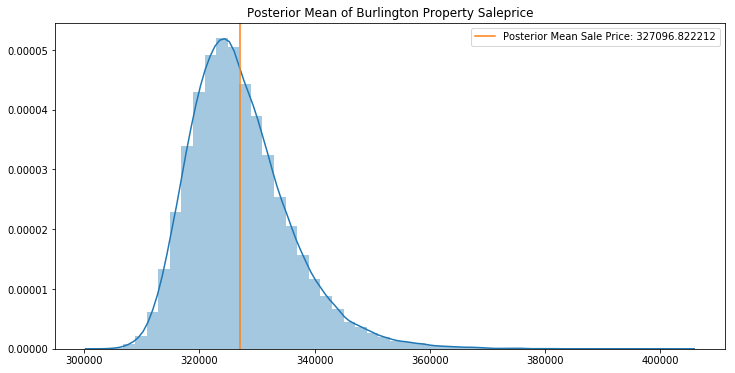

In [36]:
from bayesian_bootstrap.bootstrap import mean
import seaborn as sns 
import matplotlib.pyplot as plt 

posterior_samples = mean(df['SalePrice'].dropna(), 100000)
plt.figure(figsize = (12, 6))
sns.distplot(posterior_samples)
plt.axvline(np.mean(posterior_samples), label =  "Posterior Mean Sale Price: %f" % np.mean(posterior_samples), color = 'C1')
plt.title("Posterior Mean of Burlington Property Saleprice")
plt.legend()
plt.show()


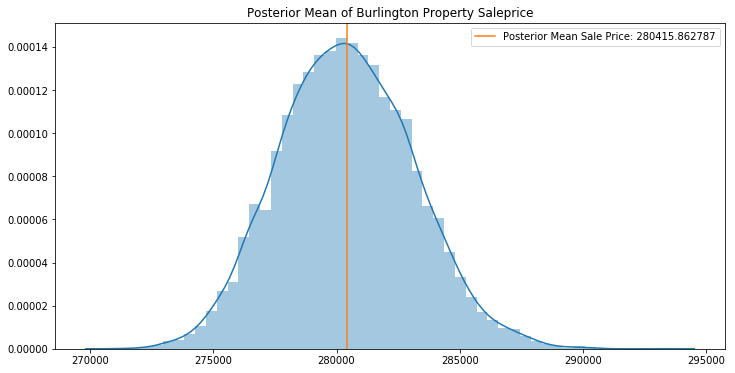

In [37]:
interest = df[['SaleDate', 'SalePrice','CurrentValue', 'LandUse', 'YearBlt']].dropna()
interest['SaleDate'] = pd.to_datetime(interest['SaleDate'])
interest = interest[(interest['LandUse'] == "Single Family") | (interest['LandUse'] == "Residential Condo")]
posterior_samples = mean(interest['SalePrice'].dropna(), 10000)
plt.figure(figsize = (12, 6))
sns.distplot(posterior_samples)
plt.axvline(np.mean(posterior_samples), label =  "Posterior Mean Sale Price: %f" % np.mean(posterior_samples), color = 'C1')
plt.title("Posterior Mean of Burlington Property Saleprice")
plt.legend()
plt.show()


In [40]:
posterior_samples = pd.Series(posterior_samples)
posterior_samples.iplot(kind = 'hist',
                        yTitle='Count',
                        title='Histogram of Posterior Samples of Mu')

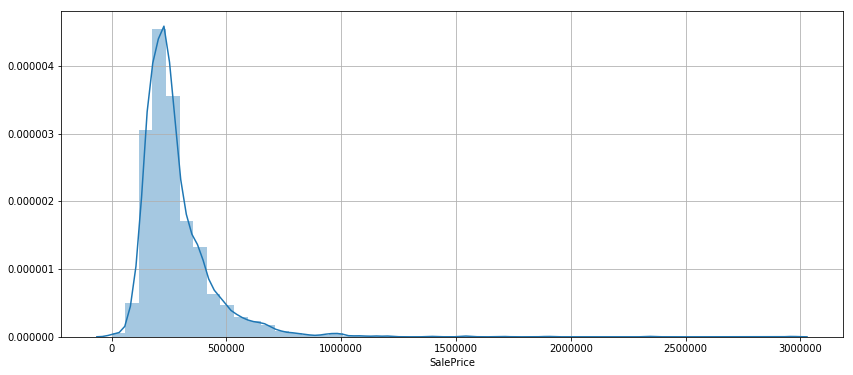

In [72]:
plt.figure(figsize = (14, 6))
sns.distplot(interest['SalePrice'])
plt.grid()

In [65]:
np.mean(interest['SalePrice'])

280356.9563356164

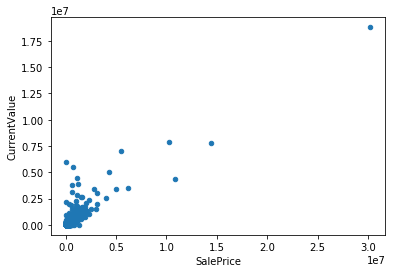

In [68]:
df.plot(x = 'SalePrice', y = 'CurrentValue', kind = 'scatter')

In [70]:
df[df['SalePrice'] > 30000000]

AccountNumber       ParcelID     SpanNumber StreetNumber  \
9327           8334  053-2-010-000  114-035-18334          128   

     AlternateNumber   StreetName Unit             CuO1LastName CuO1FirstName  \
9327             NaN  LAKESIDE AV  NaN  FORTIETH BURLINGTON LLC           NaN   

     CuO2LastName    ...    NumofRooms NumofBedrooms  Baths NumofUnits  \
9327          NaN    ...             0             0  8 / 0          8   

      ZoningCode  Foundation  Depreciation   PropertyCenterPoint    FID  \
9327         ELM           C         0.343  (-73.2177, 44.46274)  10328   

      logprice  
9327  17.22418  

[1 rows x 40 columns]